In [133]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import estimate_bandwidth, MeanShift
%matplotlib inline

In [85]:
df = pd.read_csv('./data/final_data.csv')
df.head()

,Unnamed: 0,동,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,초등_교육기관_사업체수,중등_교육기관_사업체수,고등_교육기관_사업체수,특수학교_외국인학교_대안학교_사업체수,일반교습학원_사업체수,...,남자60대이상,여자20대이하,여자20대,여자30대,여자40대,여자50대,여자60대이상,자전거도로갯수,관광지개수,버스정류장 개수
0,2,동서학동,447,81,80,2.0,0.0,2.0,0.0,6,...,8887.713333,1122.406667,1972.171667,2805.810000,3558.188333,4272.633333,6068.818333,6.0,0.0,12.0
1,3,서서학동,512,92,67,3.0,0.0,0.0,0.0,4,...,4426.356667,971.091667,1153.771667,1605.315000,2170.923333,2402.676667,3625.656667,2.0,1.0,8.0
2,4,중화산1동,926,172,262,3.0,3.0,3.0,0.0,16,...,12242.258333,3586.426667,7013.481667,6501.451667,8710.936667,8506.803333,11296.071667,3.0,0.0,11.0
3,5,중화산2동,"2,629",353,499,7.0,2.0,0.0,0.0,139,...,12719.108333,5215.040000,8051.556667,8872.545000,12533.440000,10136.705000,9579.590000,6.0,0.0,13.0
4,6,평화1동,658,112,103,2.0,3.0,0.0,0.0,5,...,4743.351667,1385.878333,1784.655000,2293.641667,3252.250000,3320.311667,4201.415000,5.0,0.0,6.0


In [86]:
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['동', '전체산업', '소매업_자동차_제외_사업체수', '숙박_음식점업_사업체수', '초등_교육기관_사업체수',
       '중등_교육기관_사업체수', '고등_교육기관_사업체수', '특수학교_외국인학교_대안학교_사업체수', '일반교습학원_사업체수',
       '기타교육기관_사업체수', '교육지원_서비스업_사업체수', '보건업_사회복지_서비스업_사업체수', '보건업_사업체수',
       '병원_사업체수', '전체산업.1', '소매업_자동차_제외_종사자수', '숙박_음식점업_종사자수', '초등_교육기관_종사자수',
       '중등_교육기관_종사자수', '고등_교육기관_종사자수', '특수학교_외국인학교_대안학교_종사자수', '일반교습학원_종사자수',
       '기타교육기관_종사자수', '교육지원_서비스업_종사자수', '보건업_사회복지_서비스업_종사자수', '보건업_종사자수',
       '병원_종사자수', '총인구_합계', '남자인구_합계', '여자인구_합계', '한국인_세대수', '한국인_총인구',
       '한국인_남자인구', '한국인_여자인구', '외국인_총인구', '외국인_남자인구', '외국인_여자인구', '하천',
       '남자20대이하', '남자20대', '남자30대', '남자40대', '남자50대', '남자60대이상', '여자20대이하',
       '여자20대', '여자30대', '여자40대', '여자50대', '여자60대이상', '자전거도로갯수', '관광지개수',
       '버스정류장 개수'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   동                     35 non-null     object 
 1   전체산업                  35 non-null     object 
 2   소매업_자동차_제외_사업체수       35 non-null     object 
 3   숙박_음식점업_사업체수          35 non-null     int64  
 4   초등_교육기관_사업체수          35 non-null     float64
 5   중등_교육기관_사업체수          35 non-null     float64
 6   고등_교육기관_사업체수          35 non-null     float64
 7   특수학교_외국인학교_대안학교_사업체수  35 non-null     float64
 8   일반교습학원_사업체수           35 non-null     int64  
 9   기타교육기관_사업체수           35 non-null     int64  
 10  교육지원_서비스업_사업체수        35 non-null     float64
 11  보건업_사회복지_서비스업_사업체수    35 non-null     int64  
 12  보건업_사업체수              35 non-null     int64  
 13  병원_사업체수               35 non-null     float64
 14  전체산업.1                35 non-null     object 
 15  소매업_자동차_제외_종사자수       35 

#### numeric화

In [91]:
df_col = ['전체산업','소매업_자동차_제외_사업체수','전체산업.1','소매업_자동차_제외_종사자수','숙박_음식점업_종사자수','고등_교육기관_종사자수','보건업_사회복지_서비스업_종사자수','보건업_종사자수','병원_종사자수']

for col in df_col:
    for i in range(len(df)):
        df[col][i]= df[col][i].strip().replace(",","")
        

<ipython-input-91-e637774ee439>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]= df[col][i].strip().replace(",","")


In [92]:
df1 = df.iloc[:,1:].apply(pd.to_numeric)

In [93]:
df.iloc[:,1:]

,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,초등_교육기관_사업체수,중등_교육기관_사업체수,고등_교육기관_사업체수,특수학교_외국인학교_대안학교_사업체수,일반교습학원_사업체수,기타교육기관_사업체수,교육지원_서비스업_사업체수,...,남자60대이상,여자20대이하,여자20대,여자30대,여자40대,여자50대,여자60대이상,자전거도로갯수,관광지개수,버스정류장 개수
0,447,81,80,2.0,0.0,2.0,0.0,6,9,0.0,...,8887.713333,1122.406667,1972.171667,2805.810000,3558.188333,4272.633333,6068.818333,6.0,0.0,12.0
1,512,92,67,3.0,0.0,0.0,0.0,4,8,0.0,...,4426.356667,971.091667,1153.771667,1605.315000,2170.923333,2402.676667,3625.656667,2.0,1.0,8.0
2,926,172,262,3.0,3.0,3.0,0.0,16,26,2.0,...,12242.258333,3586.426667,7013.481667,6501.451667,8710.936667,8506.803333,11296.071667,3.0,0.0,11.0
3,2629,353,499,7.0,2.0,0.0,0.0,139,83,2.0,...,12719.108333,5215.040000,8051.556667,8872.545000,12533.440000,10136.705000,9579.590000,6.0,0.0,13.0
4,658,112,103,2.0,3.0,0.0,0.0,5,10,1.0,...,4743.351667,1385.878333,1784.655000,2293.641667,3252.250000,3320.311667,4201.415000,5.0,0.0,6.0
5,2404,411,387,15.0,2.0,0.0,0.0,101,110,0.0,...,25634.990000,10522.798333,10554.521667,15137.653333,21426.253333,18985.028333,22685.576667,5.0,0.0,23.0
6,3287,842,585,14.0,3.0,0.0,0.0,138,125,6.0,...,20251.056667,7203.963333,11690.116667,13741.040000,19996.563333,16889.280000,15533.286667,6.0,0.0,36.0
7,998,121,92,2.0,0.0,0.0,0.0,9,20,0.0,...,4503.038333,1630.713333,1960.580000,2453.491667,3405.926667,3111.180000,3670.158333,2.0,0.0,8.0
8,1045,273,212,3.0,1.0,0.0,0.0,21,26,0.0,...,6130.726667,2515.616667,2893.030000,3421.465000,5087.563333,4732.706667,5845.838333,5.0,0.0,14.0
9,1227,173,231,9.0,5.0,0.0,0.0,57,48,2.0,...,17790.325000,6037.056667,6323.840000,9891.460000,14540.135000,13687.041667,13237.145000,5.0,0.0,19.0


#### 결측값 확인

In [95]:
df.isna().sum()

동                       0
전체산업                    0
소매업_자동차_제외_사업체수         0
숙박_음식점업_사업체수            0
초등_교육기관_사업체수            0
중등_교육기관_사업체수            0
고등_교육기관_사업체수            0
특수학교_외국인학교_대안학교_사업체수    0
일반교습학원_사업체수             0
기타교육기관_사업체수             0
교육지원_서비스업_사업체수          0
보건업_사회복지_서비스업_사업체수      0
보건업_사업체수                0
병원_사업체수                 0
전체산업.1                  0
소매업_자동차_제외_종사자수         0
숙박_음식점업_종사자수            0
초등_교육기관_종사자수            0
중등_교육기관_종사자수            0
고등_교육기관_종사자수            0
특수학교_외국인학교_대안학교_종사자수    0
일반교습학원_종사자수             0
기타교육기관_종사자수             0
교육지원_서비스업_종사자수          0
보건업_사회복지_서비스업_종사자수      0
보건업_종사자수                0
병원_종사자수                 0
총인구_합계                  0
남자인구_합계                 0
여자인구_합계                 0
한국인_세대수                 0
한국인_총인구                 0
한국인_남자인구                0
한국인_여자인구                0
외국인_총인구                 0
외국인_남자인구                0
외국인_여자인구                0
하천                      0
남자20대이하     

In [97]:
df = df.fillna(0)

## 차원 축소

In [120]:
# 스케일링
df_scaled = StandardScaler().fit_transform(df.iloc[:,1:])

In [121]:
# PCA 변환
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca_trans = pca.transform(df_scaled)
print(pca_trans.shape)

(35, 2)


In [122]:
print(pca.explained_variance_ratio_)

[0.52058956 0.11231019]


**=> PCA 요소 두개로 기존 데이터를 63%정도 설명할 수 있음**

In [123]:
# SVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(df_scaled)
tsvd_trans = tsvd.transform(df_scaled)
print(tsvd_trans.shape)

(35, 2)


In [124]:
print(tsvd.explained_variance_ratio_)

[0.52058956 0.11231019]


**=> 같은 결과**

In [102]:
# 데이터프레임으로 변환

pca_columns = ['pca_1','pca_2']
df_pca = pd.DataFrame(pca_trans, columns=pca_columns)
df_pca.head()

,pca_1,pca_2
0,-5.862997,-0.268642
1,-6.244498,-0.538220
2,-0.954224,0.914979
3,2.658709,-1.131049
4,-4.656723,0.283639


In [109]:
# '동' 칼럼과 붙이기
data = pd.concat([df['동'],df_pca], axis=1)
data.shape

(35, 3)

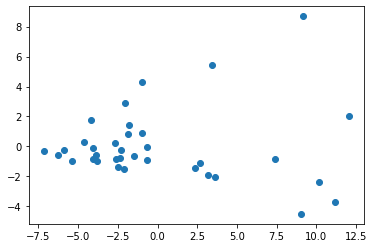

In [112]:
plt.scatter(data['pca_1'], data['pca_2'])

## 군집화

#### '동' 칼럼을 인덱스로 변경

In [136]:
jj_df = data.set_index("동")
jj_df.head()

,pca_1,pca_2
동,,
동서학동,-5.862997,-0.268642
서서학동,-6.244498,-0.538220
중화산1동,-0.954224,0.914979
중화산2동,2.658709,-1.131049
평화1동,-4.656723,0.283639


#### Mean Shift

In [137]:
# 최적의 bandwidth 찾기
bandwidth = estimate_bandwidth(jj_df)
bandwidth

4.1084460616788485

In [142]:
meanshift = MeanShift(bandwidth=4)
cluster_labels = meanshift.fit_predict(jj_df)
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

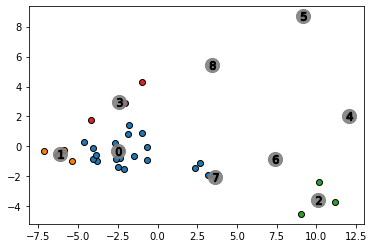

In [145]:
jj_df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
# markers=['o', 's', '^', 'x']

for label in unique_labels:
    label_cluster = jj_df[jj_df['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], edgecolor='k') #, marker=markers[label] 
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9) #, marker=markers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()